# Webscraping Basic Football Data

### Basic Libraries Used

In [131]:
!pip install plotly==5.8.0

You should consider upgrading via the 'C:\Users\Matty\anaconda3\python.exe -m pip install --upgrade pip' command.


In [132]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np
import matplotlib.pyplot as plt

### Using BeautifulSoup Lib To Obtain HTML Data as Beautiful Soup Object

In [133]:
#2021-2022 Premier League Wiki Page
prem2021_2022_url = "https://en.wikipedia.org/wiki/2021-22_Premier_League"

In [134]:
#Just request timeouts to make sure we're connecting
s = requests.Session()
response = s.get(prem2021_2022_url, timeout = 10)
response

<Response [200]>

In [135]:
html_data = BeautifulSoup(response.content, 'html.parser')
#html_data.prettify()

In [136]:

html_data.title.string

'2021–22 Premier League - Wikipedia'

### Finding A Simple Table

In [137]:
all_tables = html_data.find_all('table')[7]
all_tables #essentially looking through the tables and seeing what correlates with what is displayed within the browser

<table class="wikitable" style="text-align:center">
<tbody><tr>
<th>Rank
</th>
<th>Player
</th>
<th>Club
</th>
<th>Goals<sup class="reference" id="cite_ref-top_goals_138-0"><a href="#cite_note-top_goals-138">[137]</a></sup>
</th></tr>
<tr>
<td rowspan="2">1
</td>
<td align="left"><span class="flagicon"><a href="/wiki/Egypt" title="Egypt"><img alt="Egypt" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/23px-Flag_of_Egypt.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/35px-Flag_of_Egypt.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/45px-Flag_of_Egypt.svg.png 2x" width="23"/></a></span> <a href="/wiki/Mohamed_Salah" title="Mohamed Salah">Mohamed Salah</a>
</td>
<td align="left">Liverpool
</td>
<td rowspan="2">23
</td></tr>
<tr>
<td align="left"><span class="flagicon"><a href="/wiki/South_Korea

In [138]:
Stadiums_and_locations = html_data.find('table', {"class":'wikitable sortable'})
rows = Stadiums_and_locations.find_all("tr")
len(rows)



21

In [139]:
for row in Stadiums_and_locations.findAll("tr"):
    cells = row.findAll('td')

len(cells)

4

In [140]:
header = [th.text.rstrip() for th in rows[0].find_all('th')][:]
print(header)
print('------------')
print(len(header))

['Team', 'Location', 'Stadium', 'Capacity']
------------
4


In [141]:
df = pd.DataFrame(columns=header)

table_data = []

for row in rows[2:]:
            data = [d.text.rstrip() for d in row.find_all('td')]
            table_data.append(data)

len(table_data[0])

4

In [142]:
lst_data = pd.DataFrame(table_data, columns=header)
df = lst_data.copy()
df.head(20)

,Team,Location,Stadium,Capacity
0,Aston Villa,Birmingham,Villa Park,"42,682"
1,Brentford,London (Brentford),Brentford Community Stadium,"17,250"
2,Brighton & Hove Albion,Falmer,Falmer Stadium,"31,800"
3,Burnley,Burnley,Turf Moor,"21,944"
4,Chelsea,London (Fulham),Stamford Bridge,"40,834"
5,Crystal Palace,London (Selhurst),Selhurst Park,"25,486"
6,Everton,Liverpool (Walton),Goodison Park,"39,414"
7,Leeds United,Leeds,Elland Road,"37,792"
8,Leicester City,Leicester,King Power Stadium,"32,312"
9,Liverpool,Liverpool (Anfield),Anfield,"53,394"


### Basic Data Cleanup

In [143]:
df['Capacity'] = df['Capacity'].apply(lambda x: float(x.split()[0].replace(',', '')))
df['Capacity'] = df['Capacity'].astype(int)
df[['Team','Location','Stadium']] = df[['Team','Location','Stadium']].astype(str)
df.dtypes

Team        object
Location    object
Stadium     object
Capacity     int32
dtype: object

In [144]:
df = df.sort_values("Capacity",ascending=False)

### Basic Data Visualisation

##### Bar Chart To Understand Stadium Capacity

In [145]:
colors = ['red', 'white', 'purple', 'lightskyblue','red','grey','purple','blue','lightskyblue','yellow','red','lightskyblue','yellow','blue','green','lightskyblue','blue','red','blue','red']
bartitle = 'Capacity of Stadiums for Premier League Teams'

fig = px.bar(x=df['Team'], y=df['Capacity'], title = bartitle, labels={'x':'Teams', 'y': 'Capacity(People)'}, color_discrete_sequence=['#034694'])
fig.update_layout(width=700, height=500, bargap=0.05)

fig.show()

In [146]:

Total_Capacity = df['Capacity'].sum()
df1 = df
Total_Capacity_Percentage = []

for row in df['Capacity']:
    percentage = round(((row/Total_Capacity)*100), 2)
    Total_Capacity_Percentage.append(percentage)

df1 = df.assign(Percentage_of_Total=Total_Capacity_Percentage)
df1 = df1.reset_index(drop=True)
df1




,Team,Location,Stadium,Capacity,Percentage_of_Total
0,Manchester United,Manchester (Old Trafford),Old Trafford,74140,9.76
1,Tottenham Hotspur,London (Tottenham),Tottenham Hotspur Stadium,62850,8.28
2,West Ham United,London (Stratford),London Stadium,60000,7.90
3,Manchester City,Manchester (Bradford),Etihad Stadium,53400,7.03
4,Liverpool,Liverpool (Anfield),Anfield,53394,7.03
5,Newcastle United,Newcastle upon Tyne,St James' Park,52305,6.89
6,Aston Villa,Birmingham,Villa Park,42682,5.62
7,Chelsea,London (Fulham),Stamford Bridge,40834,5.38
8,Everton,Liverpool (Walton),Goodison Park,39414,5.19
9,Leeds United,Leeds,Elland Road,37792,4.98


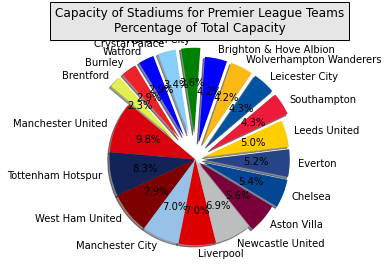

In [147]:
labels = df1['Team']
sizes = df1['Capacity']
colors = ['#da020e', '#132257', '#7f0000', '#97c1e7','#dd0000','#bbbdbf','#7b003a','#034694','#274488','#FFCD00','#ed1a3b','#0053a0','#fdb913','blue','green','lightskyblue','blue','#ed2127','#e3ee4f','#e30613']
autopct = df1['Percentage_of_Total']

fig =plt.figure()
fig.patch.set_facecolor('white')


plt.rcParams['text.color'] = 'black'


plt.pie(sizes, explode=( 0, 0, 0, 0, 0, 0, 0.05, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3,), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.rcParams['text.color'] = 'white'
plt.title(f"{bartitle}\n" + "Percentage of Total Capacity", bbox={'facecolor':'0.9', 'pad':5})
plt.show()